In [2]:
import numpy as np
import pandas as pd
from hmmlearn import hmm



In [8]:
# Step 1: Data Preprocessing
data = pd.read_csv('../data/GDELT_THA.csv')

# print(len(data))
# data.dropna(inplace=True)
# print(len(data))


# Convert string dates to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Extract date components
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(columns=['Date'], inplace=True)

data['Source'] = data['Source'].astype('category')
data['Target'] = data['Target'].astype('category')

print(data.tail())



        Source  Target  CAMEOCode  NumEvents  NumArts  QuadClass  Goldstein  \
731149  USACVL     THA         40          1       20          1        1.0   
731150  USAMED     THA         70          1        2          2        7.0   
731151  USAMED  THAMED         70          1        2          2        7.0   
731152     USA     THA         61          3       15          2        6.4   
731153     VNM     THA        160          1        2          4       -4.0   

        SourceGeoType  SourceGeoLat  SourceGeoLong  TargetGeoType  \
731149            1.0       38.0000       -97.0000            4.0   
731150            4.0       32.9049        35.8072            4.0   
731151            4.0       13.7500       100.5170            4.0   
731152            1.0       38.0000       -97.0000            1.0   
731153            4.0       10.7500       106.6670            1.0   

        TargetGeoLat  TargetGeoLong  ActionGeoType  ActionGeoLat  \
731149       25.0000        45.0000       

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])
data.drop(columns=['Source', "Target"], inplace=True)
data.head(15)

,CAMEOCode,NumEvents,NumArts,QuadClass,Goldstein,SourceGeoType,SourceGeoLat,SourceGeoLong,TargetGeoType,TargetGeoLat,TargetGeoLong,ActionGeoType,ActionGeoLat,ActionGeoLong,Year,Month,Day,Source_encoded,Target_encoded
0,80,2,6,2,5.0,1.0,13.0000,105.0000,1.0,13.0000,105.0000,1.0,13.0000,105.0000,1979,1,2,1799,2723
1,51,1,2,1,3.4,1.0,35.0000,38.0000,4.0,33.3386,44.3939,4.0,33.3386,44.3939,1979,1,2,1976,2971
2,10,1,2,1,0.0,4.0,11.9934,105.4640,4.0,62.2333,145.5000,4.0,62.2333,145.5000,1979,1,4,1048,2723
3,130,1,9,3,-4.4,4.0,11.5500,104.9170,4.0,16.9520,99.9777,4.0,16.9520,99.9777,1979,1,4,1048,2723
4,190,1,6,4,-10.0,4.0,11.5500,104.9170,4.0,11.5500,104.9170,4.0,11.5500,104.9170,1979,1,4,1048,2723
5,43,1,3,1,2.8,4.0,17.9667,102.6000,4.0,17.9667,102.6000,4.0,17.9667,102.6000,1979,1,4,1142,2723
6,43,2,6,1,2.8,4.0,17.9667,102.6000,4.0,17.9667,102.6000,4.0,17.9667,102.6000,1979,1,4,1142,2749
7,42,1,6,1,1.9,4.0,48.3753,41.6275,4.0,48.3753,41.6275,4.0,48.3753,41.6275,1979,1,4,2002,1880
8,72,3,7,2,8.3,4.0,16.9520,99.9777,4.0,16.9520,99.9777,4.0,21.0333,105.8500,1979,1,4,1976,1785
9,73,2,2,2,7.4,4.0,11.5500,104.9170,4.0,11.5500,104.9170,4.0,11.5500,104.9170,1979,1,4,1976,1785


In [11]:

data.to_csv("../data/GDELT_THA_num.csv")

In [ ]:
# Example how to initialize and train the HMM
model = hmm.GaussianHMM(n_components=2)
X = data[['Latitude', 'Longitude', 'Time']].values
model.fit(X)

# Step: Inference

In [4]:
data = pd.read_csv('../data/GDELT_THA_num.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

filtered_data = data[data['CAMEOCode'].isin(range(14, 1455))]

grouped_data = filtered_data.groupby('Date')['NumEvents'].sum().reset_index()

grouped_data['RollingMean_90days'] = grouped_data['NumEvents'].rolling(window=90, min_periods=1).mean()

grouped_data['Ratio'] = grouped_data['NumEvents'] / grouped_data['RollingMean_90days']
M_at = np.sum(grouped_data['Ratio'])/len(grouped_data)
grouped_data['Ratio/7'] = grouped_data['Ratio']/7

print(grouped_data)
print(M_at)

            Date  NumEvents  RollingMean_90days     Ratio   Ratio/7
0     1979-01-02          3            3.000000  1.000000  0.142857
1     1979-01-04         18           10.500000  1.714286  0.244898
2     1979-01-05         32           17.666667  1.811321  0.258760
3     1979-01-06         21           18.500000  1.135135  0.162162
4     1979-01-07         46           24.000000  1.916667  0.273810
...          ...        ...                 ...       ...       ...
12622 2014-02-13        457          394.644444  1.158004  0.165429
12623 2014-02-14        432          395.111111  1.093363  0.156195
12624 2014-02-15        307          395.766667  0.775710  0.110816
12625 2014-02-16        227          393.888889  0.576305  0.082329
12626 2014-02-17        433          391.988889  1.104623  0.157803

[12627 rows x 5 columns]
1.0261676388177559


In [8]:
import pandas as pd
from tqdm import tqdm

data = pd.read_csv('../data/GDELT_THA_num.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

filtered_data = data[data['CAMEOCode'].isin(range(14, 1455))]

rolling_sums = []

for date in tqdm(filtered_data['Date'], desc="Calculating Rolling Sums"):
    start_date = date - pd.Timedelta(days=3)
    end_date = date + pd.Timedelta(days=3)
    
    window_data = filtered_data[(filtered_data['Date'] >= start_date) & (filtered_data['Date'] <= end_date)]
    window_sum = window_data['NumEvents'].sum()
    
    rolling_sum = window_sum / 7
    
    rolling_sums.append(rolling_sum)

filtered_data['Rolling7days'] = rolling_sums

print(filtered_data)


Calculating Rolling Sums:   4%|▎         | 23557/653655 [01:45<50:36, 207.54it/s]

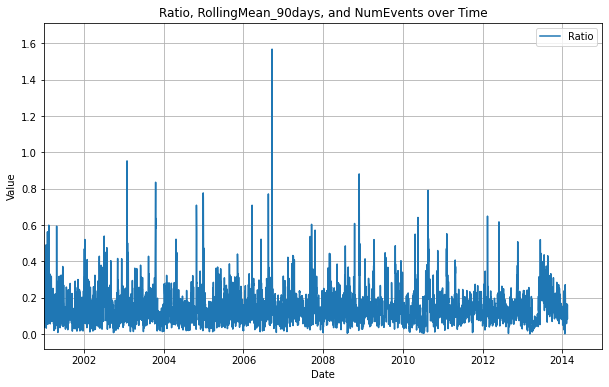

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Date'], grouped_data['Ratio']/7, label='Ratio')
# plt.plot(grouped_data['Date'], grouped_data['RollingMean_90days'], label='RollingMean_90days')
# plt.plot(grouped_data['Date'], grouped_data['NumEvents'], label='NumEvents')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xlim(pd.to_datetime('2001-01-01'), pd.to_datetime('2015-01-01'))
plt.title('Ratio, RollingMean_90days, and NumEvents over Time')
plt.legend()
plt.grid(True)
plt.show()
